In [15]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import numpy as np




In [16]:
df = pd.read_csv('KS_train_data.csv', delimiter=',', error_bad_lines=False)
df

,project_id,backers_count,blurb,category,converted_pledged_amount,country,created_at,currency,deadline,fx_rate,...,launched_at,name,pledged,staff_pick,usd_pledged,location,funded,subcategory,project_url,reward_url
0,KS_000000,80,I will be an artist-in-residence at Elsewhere ...,art,3596,US,1325980505,USD,1334866560,1.000000,...,1332969260,Elsewhere Studios artist-in-residency program!,3596.00,False,3596.000000,"Paonia, CO",True,mixed media,https://www.kickstarter.com/projects/hilaryeme...,https://www.kickstarter.com/projects/hilaryeme...
1,KS_000001,82,1000 Artists is a public art-making installati...,art,4586,US,1330926084,USD,1336440145,1.000000,...,1332984145,1000 Artists: Presidential Inauguration 2013,4586.00,False,4586.000000,"Washington, DC",True,public art,https://www.kickstarter.com/projects/17146650/...,https://www.kickstarter.com/projects/17146650/...
2,KS_000002,21,"The Sequel to ‘My Favorite Machine”, ""MyPhoneH...",art,5217,US,1332382894,USD,1338175739,1.000000,...,1332991739,MyPhoneHenge,5217.00,False,5217.000000,"Frisco, TX",True,sculpture,https://www.kickstarter.com/projects/belveal/m...,https://www.kickstarter.com/projects/belveal/m...
3,KS_000003,37,A film exploring the role and value of art edu...,art,7160,GB,1332342451,USD,1334806096,1.000000,...,1332991696,Walk-Through,7160.00,False,7160.000000,"Glasgow, UK",True,art,https://www.kickstarter.com/projects/107813091...,https://www.kickstarter.com/projects/107813091...
4,KS_000004,153,We need to build a kitchen for Habitable Space...,art,15445,US,1328562617,USD,1335584240,1.000000,...,1332992240,A kitchen for Habitable Spaces,15445.00,False,15445.000000,"Kingsbury, TX",True,public art,https://www.kickstarter.com/projects/104409276...,https://www.kickstarter.com/projects/104409276...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,KS_099995,104,Make the workshop/ small stage space at Jimmy'...,theater,7595,US,1348677893,USD,1356552252,1.000000,...,1353960252,"Help Fund the ""Back Room"" Arts Space at Jimmy'...",7595.43,False,7595.430000,"New York, NY",True,spaces,https://www.kickstarter.com/projects/jimmycarb...,https://www.kickstarter.com/projects/jimmycarb...
99996,KS_099996,307,Help create a permanent home for live comedy s...,theater,27196,US,1364939099,USD,1367674009,1.000000,...,1365082009,The Coalition Theater,27196.71,False,27196.710000,"Richmond, VA",True,spaces,https://www.kickstarter.com/projects/rvacomedy...,https://www.kickstarter.com/projects/rvacomedy...
99997,KS_099997,143,Voix de Ville is a pop-up imaginarium of neo-v...,theater,7226,US,1366078694,USD,1373738400,1.000000,...,1370568560,The Voix De Ville! : A Pop-up Theater and Cabaret,7226.00,True,7226.000000,"Cleveland, OH",True,spaces,https://www.kickstarter.com/projects/160171209...,https://www.kickstarter.com/projects/160171209...
99998,KS_099998,329,Help Synetic Theater create a new Studio to pr...,theater,31683,US,1372177000,USD,1376654340,1.000000,...,1373568644,Save the Studio!,31683.00,False,31683.000000,"Arlington, VA",True,spaces,https://www.kickstarter.com/projects/967829854...,https://www.kickstarter.com/projects/967829854...


# Data Expolation & Understanding

## Wrangling

### Structure:

**Does it have the right structure for the purpose? (can we give them an .xmml?)**

The train data consist of 10,000 project considering 19 variable, such as date event created, deadline,goal of the project. In my opnion, this is already a structured data, because we can find the framework of each project directly. Therefore, the data can be putted in xml file because they are already good structured. 


**Is the data structured by record?** 

Comparing this data with the Train data. Test data is merely dominated with categorial informattion comparing to numerical information. However, it is still well-structured, but less structured than Train data. 

**What are the record delimiters?**

Also, both data are fixed filled in the file. This can be seen by both data are despicted in rows and columns which then can be viewed into pre-defined data. This is clearly the indication of structured data. Nevertheless, the Delimiter is the ',' which indicates the separation of rows and columns. 

**What are the field delimiters?**

Looking at the CSV file, we can see that the field delimiters are regular commas

**There are no column headlings**

Are there column headlings?



Granularity:
**Do you think the granularity is good enough for the purpose? (of this and that column)**
I believe it is slightly coarse and has some missing entries that might effect the success of the project in addition the reward column is too wide for it to have an effect

**2. Do all records represents reality at the same granularity?**
Yes


Accuracy:
**Can we check the validity of certain fields, such as e-mails, credit cards nr?** 

We can just by going to the url and comparing the data to the one we have even though it cannot be efficently done


## Correlations

<AxesSubplot:>

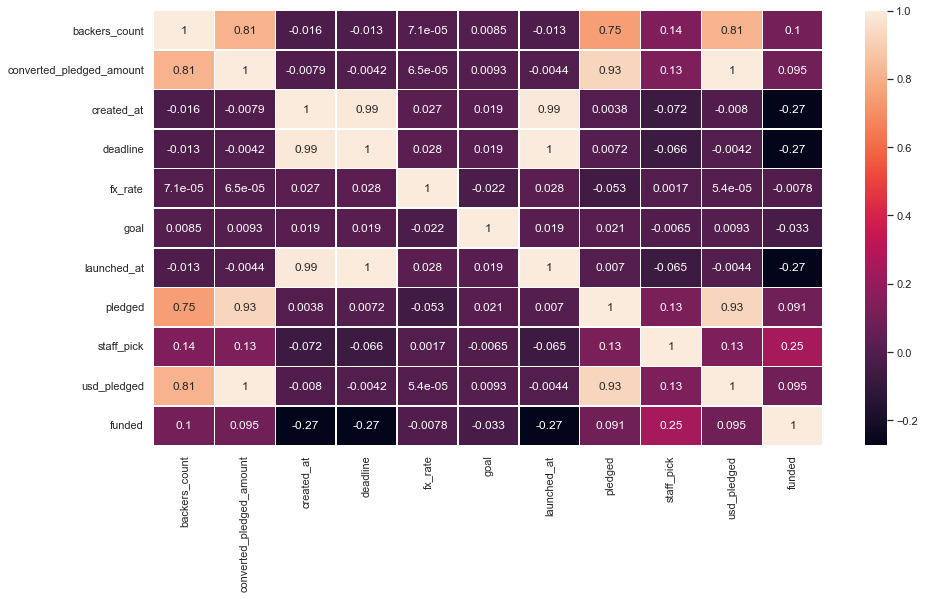

In [17]:
correlations = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})

sns.heatmap(correlations, annot=True, linewidths=0.5)

## Outliers

sns.distplot(df['goal'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


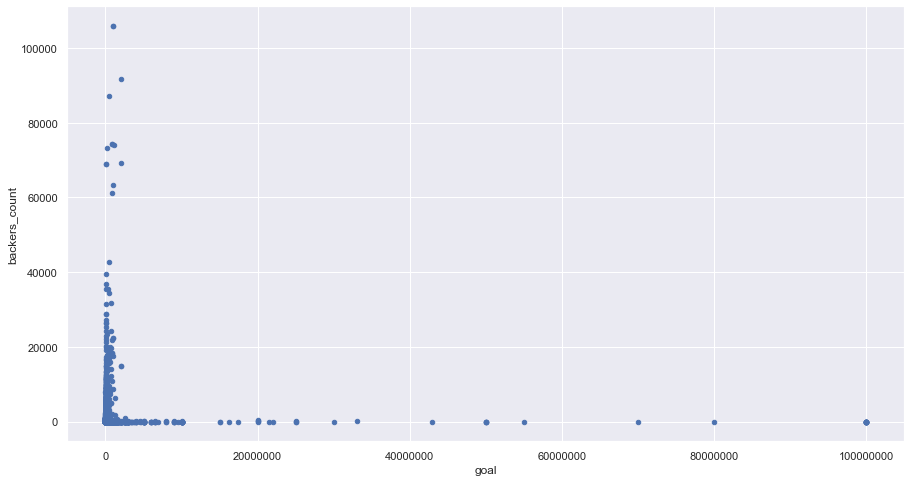

In [18]:
plot = df.plot.scatter(y='backers_count', x='goal')
plot.ticklabel_format(style='plain', useOffset=False)

We consider outliers the projects that have a goal > 1000000

df = df.drop(df.loc[df['goal']>1000000].index) #delete outliers
plot = df.plot.scatter(y='backers_count', x='goal')
plot.ticklabel_format(style='plain', useOffset=False)

## Missing Values

df.isnull().sum()

We see very few null values in the data. So we're going to manually visit the project pages and get the value (blurb, country, name) ourselves.

In [19]:
df.iat[1857, 5] = 'NA' #Namibia
df.at[46838, 'country'] = 'NA'
df.at[56883, 'country'] = 'NA'

df = df.drop(df.loc[df['blurb'].isnull()].index) #remove items that have no blurb
df = df.drop(df.loc[df['country'].isnull()==True].index) #remove items that have no blurb

df.isnull().sum()

project_id                  0
backers_count               0
blurb                       0
category                    0
converted_pledged_amount    0
country                     0
created_at                  0
currency                    0
deadline                    0
fx_rate                     0
goal                        0
launched_at                 0
name                        0
pledged                     0
staff_pick                  0
usd_pledged                 0
location                    0
funded                      0
subcategory                 0
project_url                 0
reward_url                  0
dtype: int64

## Normality

stats.probplot(df['goal'], plot=plt, dist='norm')

In [20]:
df2=df.copy()

df2=df2.drop(['project_id','blurb','category','country','currency','name','created_at','deadline','launched_at','staff_pick','location','funded','subcategory', 'project_url', 'reward_url'],axis=1)
# df2=df2.set_index('project_id')
df2=df2.apply(pd.to_numeric)
df2= np.log10(df2)
df2 = df2.rename(columns={'backers_count': 'backers_count_log', 'converted_pledged_amount': 'converted_pledged_amount_log','fx_rate': 'fx_rate_log','goal': 'goal_log','pledged': 'pledged_log','usd_pledged': 'usd_pledged_log'})

# df=df.set_index('project_id')
df = df.merge(df2, left_index=True, how='inner',right_index=True)

# Data Prep

In [21]:
# ONLY NEEDED FOR TEST SET
def prepareDataframe(dataframe):
	#remove items that have no blurb
	dataframe = dataframe.drop(dataframe.loc[dataframe['blurb'].isnull()==True].index) 

	#normalise goal and fx_rate
	dataframe['goal_log'] = np.log10(dataframe['goal'])
	dataframe['fx_rate_log'] = np.log10(dataframe['fx_rate'])

	return dataframe

	


# AFTER FEATURE Derivation
def encodeVariables(dataframe): #Encodes categoricals and converts datetimes to int
	cat_encode(['category', 'country', 'subcategory', 'currency', 'location'],dataframe)

	revertDatetime(['created_at', 'deadline', 'launched_at'],dataframe)

	dataframe['duration'] = dataframe['duration'].dt.days	


def dropNonNumerical(dataframe):
	#drop non-numerical features
	dataframe = dataframe.drop(['project_id', 'blurb', 'name', 'reward_url', 'project_url', 'goal', 'fx_rate'], axis=1)





#helpers
def revertDatetime(keys, df):
	for key in keys:
		df[key] = pd.to_datetime(df[key]).astype(int)


# Encode categorical variables
def cat_encode(keys, df):
	for key in keys:
		df[key] = df[key].astype('category').cat.codes

# Feature Derivation

In [22]:
def deriveFeatures(dataframe): # Call this to derive features :)
	#convert dates to datetime format
	dataframe[['created_at', 'deadline', 'launched_at']] = dataframe[['created_at', 'deadline', 'launched_at']].apply(pd.to_datetime,unit='s')

	#derive duration
	dataframe['duration'] = (dataframe['deadline'] - dataframe['launched_at'])

	#derive word count for name & blurb
	dataframe['word_count'] = get_word_count(dataframe['blurb'])
	dataframe['name_count'] = get_word_count(dataframe['name'])	

	#calculate same day launches
	get_same_day_launced(dataframe)

	#get readablity of name and blurb
	# get_readablity(dataframe)



def get_word_count(blurb_list):
    word_list =[]
    for blurb_index in blurb_list:
        word_list.append(len(str(blurb_index).split()))
    return word_list


def get_same_day_launced(dataframe): #calculate how many prjects were launched on the same day
	for key in ['launched_at', 'created_at', 'deadline']: 
		dataframe[key] = dataframe[key].dt.date
	
	possibleDates = dataframe['launched_at'].unique()
	dataframe['same_day_projects'] = 0
	for date in possibleDates:
		sameDayProj = dataframe.loc[dataframe['launched_at']==date]
		dataframe['same_day_projects'].loc[dataframe['launched_at']==date] = len(sameDayProj)	


def get_readablity(dataframe): #TODO something doesn't work, it gives the same redablity to everything
	import textstat
	from textstat import flesch_reading_ease

	# for index, row in dataframe.iterrows():
	# 	t=row['blurb'];
	# 	text=str(t)

	for copy in ['blurb', 'name']:
		read = []
		for i in dataframe[copy].head(10):
			print(i)
			# read.append(textstat.flesch_reading_ease(str(i)))
			dataframe[copy+'_readability'] = textstat.flesch_reading_ease(str(i))


# Modeling

In [40]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)



In [24]:
deriveFeatures(df) # Derive features name-count, blurb-count, same-day-launched

cleanDF = df.drop(['project_id', 'project_url', 'reward_url', 'fx_rate', #Remove features not present in the test set
					'goal','name', 'pledged', 'usd_pledged', 'backers_count', 
					'blurb', 'converted_pledged_amount','converted_pledged_amount_log',
					'usd_pledged_log','backers_count_log','pledged_log' ], axis=1)

encodeVariables(cleanDF) #Encode categoricals and convert datetimes to int

/Users/nikitasfilosofof/.pyenv/versions/3.9.1/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [25]:
trainDF = cleanDF.drop('funded', axis=1)

target = df['funded']

Index(['category', 'country', 'created_at', 'currency', 'deadline',
       'launched_at', 'staff_pick', 'location', 'subcategory', 'fx_rate_log',
       'goal_log', 'duration', 'word_count', 'name_count',
       'same_day_projects'],
      dtype='object')

## Random Forest

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(trainDF, target, test_size=0.3) # Train:Test = 70%:30%

forest = RandomForestClassifier(n_estimators=100)


forest.fit(Xtrain, ytrain)

score = cross_val_score(forest, Xtest, ytest, cv=5).mean()

print(score * 78065)

60942.74333333333


Given the model with intuitivly selected hyperparameters, we estimate that it will classify approximately 60000 campaigs as True (funded)

### Tuning

In [36]:
#Broad estimate using random search

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 50, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

print(random_grid)	

{'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 42)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 20, scoring='neg_mean_absolute_error', 
                              cv = 3, verbose=2, random_state=42, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(Xtrain, ytrain);

In [46]:
rf_random.best_params_


{'n_estimators': 10,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 26,
 'bootstrap': True}